# Human Resource Analytics

The cost of replacing an employee is often larger than 100K USD. We can use data science to help in this area. We are using Machine Learning with classification to try to solve this problem.

First we import the libraries that are required for solving this problem which are numpy, pandas, matplotlib and seaborn.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Now we import the dataset.

In [3]:
dataset=pd.read_csv('HR_comma_sep.csv')

In [4]:
from sklearn.preprocessing import StandardScaler

In [6]:
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

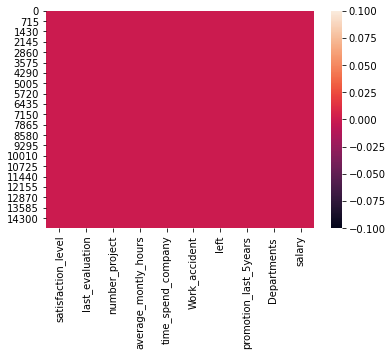

In [6]:
sns.heatmap(dataset.isnull())

We can see from the heatmap produces that there is not a single null value in the dataset.
The column "left" is the target of this dataset. Hence, we are creating a visual representation of how many employees left the company and how many stayed.

In [7]:
dataset.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

<AxesSubplot:xlabel='left', ylabel='count'>

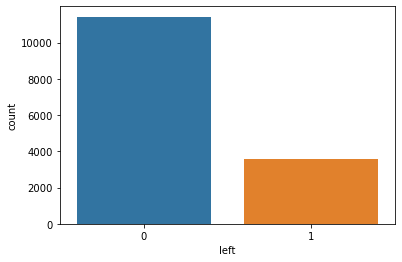

In [8]:
sns.countplot(x='left',data=dataset)

"1" indicates the number of employees that left, and "0" indicates the number of employees that stayed.

Now let's see the significance of different features on the employees that left and didn't leave

<AxesSubplot:xlabel='left', ylabel='count'>

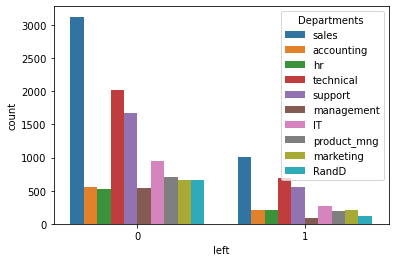

In [9]:
sns.countplot(x='left',hue='Departments ',data=dataset)

Now let's see the significance of different features on the employees that left and didn't leave.

<AxesSubplot:xlabel='left', ylabel='count'>

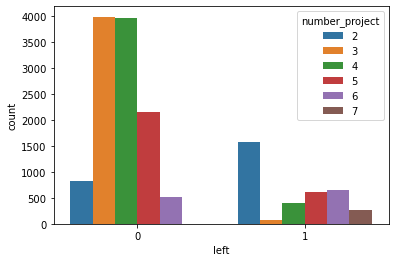

In [10]:
sns.countplot(x='left', hue = 'number_project', data=dataset)

<AxesSubplot:xlabel='left', ylabel='count'>

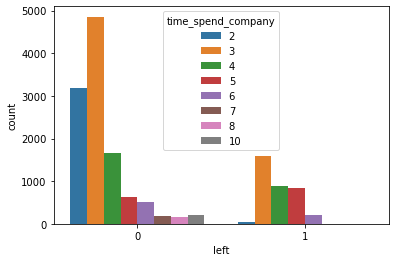

In [11]:
sns.countplot(x='left', hue = 'time_spend_company', data=dataset)

<AxesSubplot:xlabel='left', ylabel='count'>

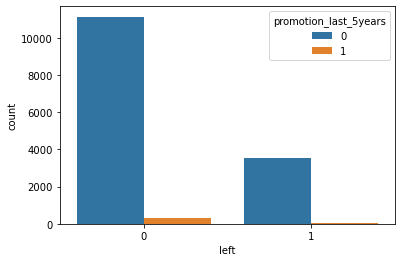

In [12]:
sns.countplot(x='left', hue = 'promotion_last_5years', data=dataset)

In [13]:
left=dataset[dataset['left']==1]
notleft=dataset[dataset['left']==0]

<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

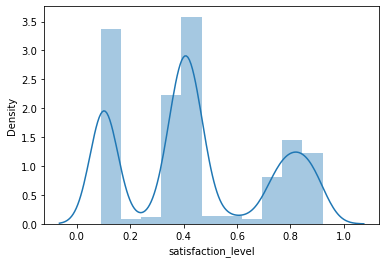

In [14]:
sns.distplot(left['satisfaction_level'])

<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

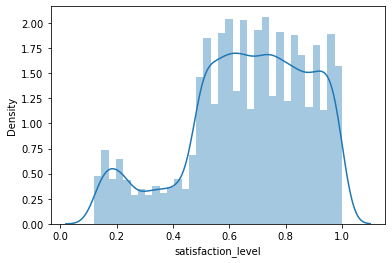

In [15]:
sns.distplot(notleft['satisfaction_level'])

<AxesSubplot:xlabel='last_evaluation', ylabel='Density'>

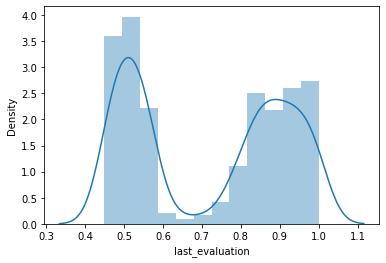

In [16]:
sns.distplot(left['last_evaluation'])

<AxesSubplot:xlabel='last_evaluation', ylabel='Density'>

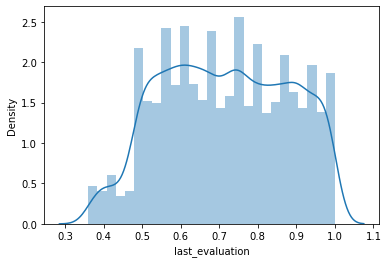

In [17]:
sns.distplot(notleft['last_evaluation'])

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

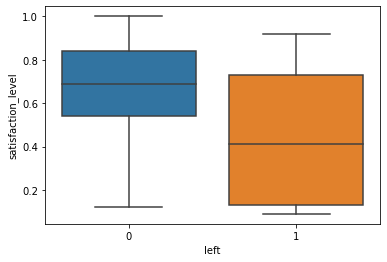

In [18]:
sns.boxplot(x='left',y='satisfaction_level',data=dataset)

<AxesSubplot:xlabel='Departments ', ylabel='satisfaction_level'>

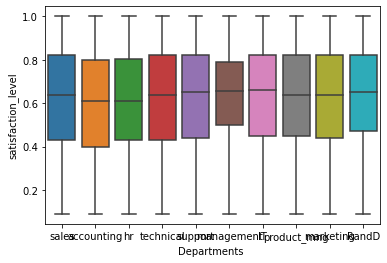

In [19]:
sns.boxplot(x='Departments ',y='satisfaction_level',data=dataset)

<AxesSubplot:xlabel='average_montly_hours', ylabel='Density'>

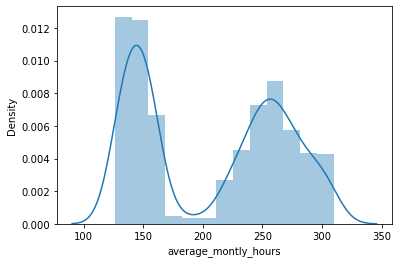

In [20]:
sns.distplot(left['average_montly_hours'])

<AxesSubplot:xlabel='average_montly_hours', ylabel='Density'>

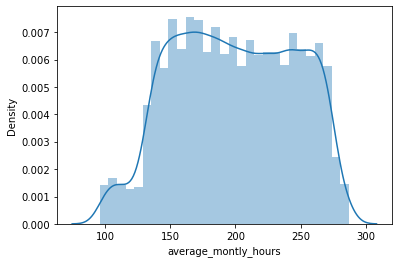

In [21]:
sns.distplot(notleft['average_montly_hours'])

Dealing with categorical variables

In [5]:
dep=pd.get_dummies(dataset['Departments '],drop_first='true')

In [8]:
dep

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,1,0


In [6]:
sal=pd.get_dummies(dataset['salary'],drop_first='true')

In [10]:
sal

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [7]:
dataset.drop(['Departments ','salary'],axis=1,inplace=True)

In [8]:
dataset=pd.concat([dataset,sal,dep],axis=1)

In [13]:
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,low,medium,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [9]:
x=dataset.drop('left',axis=1).values

In [10]:
y=dataset['left'].values

In [11]:
x

array([[0.38, 0.53, 2.  , ..., 1.  , 0.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 1.  , 0.  , 0.  ],
       [0.11, 0.88, 7.  , ..., 1.  , 0.  , 0.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 1.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 1.  , 0.  ]])

In [12]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [13]:
scaler = StandardScaler()
  
# To scale data
scaler.fit(dataset)
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,low,medium,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,1,0,0,0,0,0,0,0,0,1,0


Splitting the data

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)


LogisticRegression()

In [16]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
model.predict(x)

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [17]:
y_pred=reg.predict(x_test)

Accuracy and confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)

In [38]:
print(cm)

[[3125  291]
 [ 645  439]]


In [39]:
x_test.shape

(4500, 18)

In [40]:
accuracy_score(y_test,y_pred)

0.792

# K Nearest Neighbour

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [20]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3216  200]
 [  87  997]]


In [21]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

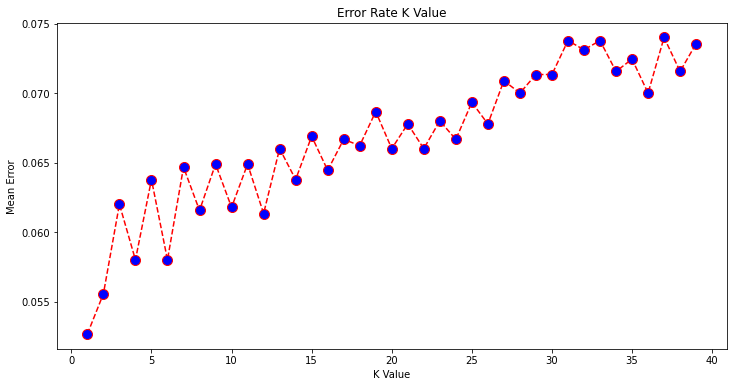

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dc=DecisionTreeClassifier(random_state=0)
dc.fit(x_train,y_train) 

DecisionTreeClassifier(random_state=0)

In [22]:
y_pred2 = dc.predict(x_test) 
y_pred2

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_dt=confusion_matrix(y_test, y_pred2)
print("Confusion matrix:\n", cm_dt)
print("Accuracy score: ", accuracy_score(y_test, y_pred2))

Confusion matrix:
 [[3367   49]
 [  41 1043]]
Accuracy score:  0.98


[Text(1011.2559726962457, 366.93, 'X[0] <= 0.415\ngini = 0.272\nsamples = 4500\nvalue = [3770, 730]'),
 Text(608.6461177474403, 339.75, 'X[5] <= 0.5\ngini = 0.448\nsamples = 999\nvalue = [339, 660]'),
 Text(383.14889078498294, 312.57, 'X[7] <= 0.5\ngini = 0.399\nsamples = 905\nvalue = [249, 656]'),
 Text(166.40017064846418, 285.39, 'X[4] <= 3.5\ngini = 0.5\nsamples = 399\nvalue = [199, 200]'),
 Text(62.84641638225256, 258.21, 'X[0] <= 0.165\ngini = 0.117\nsamples = 160\nvalue = [150, 10]'),
 Text(22.853242320819113, 231.02999999999997, 'X[3] <= 195.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(11.426621160409557, 203.85, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(34.27986348122867, 203.85, 'X[1] <= 0.625\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(22.853242320819113, 176.67, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(45.70648464163823, 176.67, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(102.839590443686, 231.02999999999997, 'X[1] <= 0.825\ngini = 0.

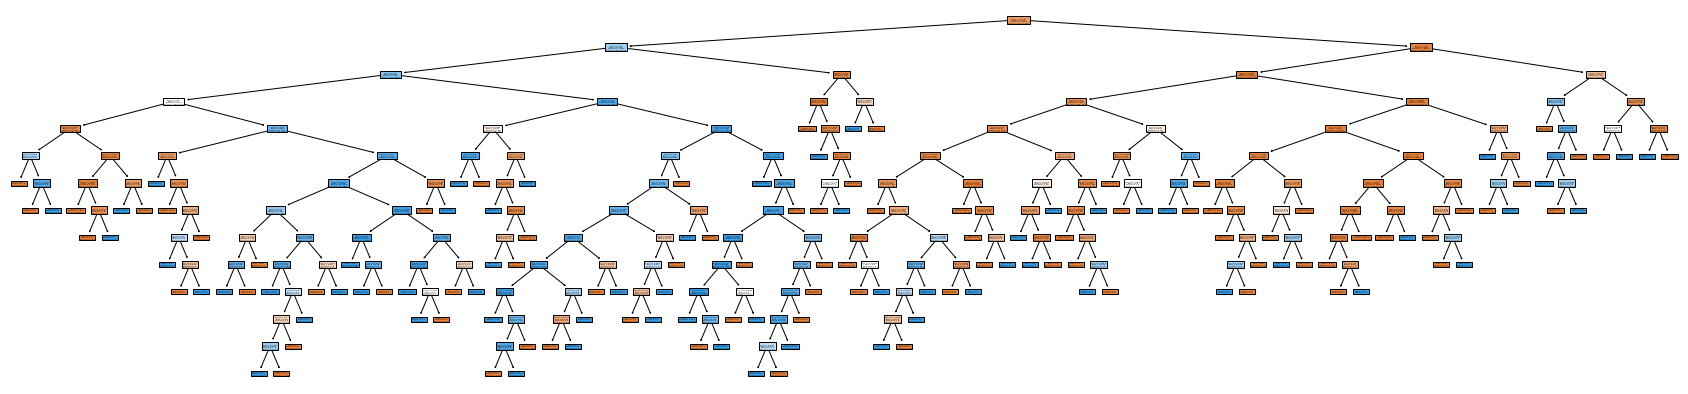

In [33]:
df=dc.fit(x_test,y_pred)
plt.figure(figsize=(30,7))
plot_tree(df,filled=True)

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [24]:
y_pred = classifier.predict(x_test)

In [25]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [26]:
cmr=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.9877777777777778

In [27]:
print("confusionmatrix:\n",cmr)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

confusionmatrix:
 [[3404   12]
 [  43 1041]]
Accuracy score:  0.9877777777777778
